#  Neural Network That Can Read Handwriting

## Importing Libraries: 
The code begins by importing necessary libraries such as os, numpy, matplotlib, tensorflow, and keras for handling data, visualization, and building the neural network model.

In [30]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras

## Loading and Splitting Data: 
The next block loads the MNIST dataset using the keras.datasets.mnist.load_data() function. It splits the dataset into training and testing sets, assigning the features and labels to x_train, y_train, x_test, and y_test respectively.

In [31]:
(x_train, y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()

In [32]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

60000
60000
10000
10000


## Inspecting a Training Example:
The code displays the shape of the 7th training example from x_train using x_train[7].shape. This helps to understand the dimensions of the input data.

In [33]:
x_train[7].shape

(28, 28)

## Visualizing an Image: 
The code uses matplotlib.pyplot.matshow() to display the 7th training image from x_train. This allows visual inspection of the image data.

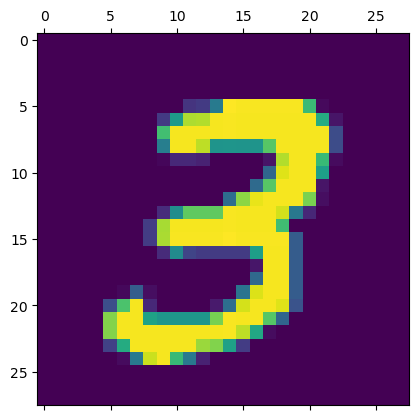

In [34]:
plt.matshow(x_train[7])

## Building the Model: 
The code initializes a sequential model using tf.keras.models.Sequential(). It then adds layers to the model: a flatten layer to convert the 2D input data to 1D, two dense layers with ReLU activation, and a final dense layer with softmax activation for multi-class classification.

In [35]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

### Compiling the Model: 
The model is compiled with the Adam optimizer, sparse categorical cross-entropy loss function, and accuracy as the evaluation metric.

In [36]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [46]:
model.fit(x_train, y_train, epochs = 6)

Epoch 1/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1265 - accuracy: 0.9646
Epoch 2/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1149 - accuracy: 0.9681
Epoch 3/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1111 - accuracy: 0.9695
Epoch 4/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1005 - accuracy: 0.9723
Epoch 5/6
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0994 - accuracy: 0.9726
Epoch 6/6
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0891 - accuracy: 0.9762


### Evaluating the Model: 
The model.evaluate() function evaluates the trained model on the testing data (x_test and y_test) and prints the loss and accuracy metrics.

In [47]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1389 - accuracy: 0.9680


[0.13892871141433716, 0.9679999947547913]

In [48]:
y_predicted = model.predict(x_test)

313/313 [==============================] - 0s 1ms/step


In [49]:
y_predicted[54]

array([1.7288345e-22, 0.0000000e+00, 7.6670890e-24, 3.4306915e-29,
       6.6690554e-26, 1.8199338e-16, 1.0000000e+00, 8.1160086e-36,
       2.5870765e-20, 4.2441060e-20], dtype=float32)

### Visualizing a Predicted Image: 
The code displays the 54th test image from x_test using matplotlib.pyplot.matshow(). This helps visualize the image for comparison with the predicted label.

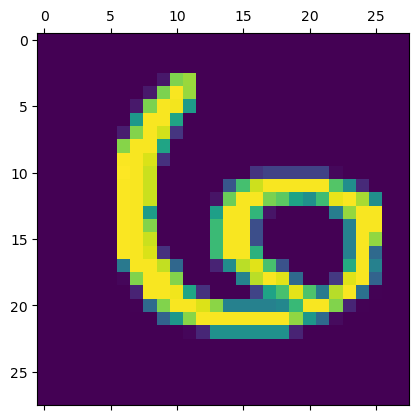

In [50]:
plt.matshow(x_test[54])

In [51]:
np.argmax(y_predicted[54])

6

In [52]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

## Visualizing the Confusion Matrix: 
The code uses seaborn.heatmap() to create a heatmap of the confusion matrix. The confusion_mat variable, however, is not defined in the given code snippet, so it needs to be defined earlier for this block to execute properly. The confusion matrix helps visualize the performance of the model in terms of predicted labels compared to the true labels. The x-axis represents predicted labels, and the y-axis represents true labels.

In [53]:
confusion_mat = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

Text(58.222222222222214, 0.5, 'Truth')

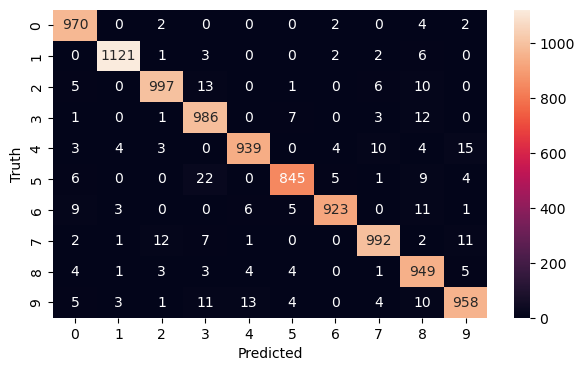

In [62]:
import seaborn as sn
plt.figure(figsize = (7,4))
sn.heatmap(confusion_mat, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')